# CM Casus 2024

## Index

 1. [Projectleden](#Projectleden)
 2. [Onderzoeksvragen](#Onderzoeksvragen)
 3. [Algemene Bewerkingen](#Algemene-Bewerkingen)
 4. [Onderzoeksvraag 1](#Onderzoeksvraag-1)
 5. [Onderzoeksvraag 2](#onderzoeksvraag-2)
 6. [Onderzoeksvraag 3](#onderzoeksvraag-3)

<a id="Projectleden"></a>
## Projectleden

Dit document is gemaakt in 2024 door:

Rick van der Kleij (1826226)  

voor de Casus Opdracht van het vak Computational Modelling, aan de Hogeschool Utrecht, gegeven door: 

Rianne van Os.

<a id="Onderzoeksvragen"></a>
## Onderzoeksvragen

[Onderzoeksvraag 1](#Onderzoeksvraag-1)

In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB?

[Onderzoeksvraag 2](#onderzoeksvraag-2)

In hoeverre is het mogelijk om te voorspellen of een film een oscar heeft gewonnen op basis van de dataset.

[Onderzoeksvraag 3](#onderzoeksvraag-3)

In hoeverre is het mogelijk om logische clusters te vinden o.b.v. onder andere budget en omzet?  
Denk aan blockbusters (hoog budget en hoge omzet), flops (hoog budget en lage omzet) of cultfilms (laag budget en hoge omzet). Je mag extra features toevoegen.

<a id="Algemene-Bewerkingen"></a>
## Algemene Bewerkingen

### Package Imports

Voor dit project gaan we gebruik maken van de volgende libraries: 
- pandas 
- numpy 
- seaborn
- matplotlib
- scipy
- sklearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.mixture import GaussianMixture
from sklearn.metrics import root_mean_squared_error
from matplotlib.lines import Line2D
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import f1_score

### Data Importeren

In [2]:
movie_df = pd.read_csv("Movie_dataset.csv")

### Algemene Data Verkenning en Analyse


Hier wordt de data ingedoken.

In [3]:
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Feature Variabelen

We gaan de feature variabelen onderzoeken. Als eerste gaan we voor elke kolom kijken wat het type en het meetniveau is.


| Kolomnaam                 | Type   | Meetniveau |
| ------------------------- | ------ | ---------- |
| color                     | string | Nominaal   |
| director_name             | string | Nominaal   |
| num_critic_for_reviews    | int    | Discreet   |
| duration                  | int    | Continu    |
| director_facebook_likes   | int    | Discreet   |
| actor_3_facebook_likes    | int    | Discreet   |
| actor_2_name              | string | Nominaal   |
| actor_1_facebook_likes    | int    | Discreet   |
| gross                     | int    | Continu    |
| genres                    | string | Nominaal   |
| actor_1_name              | string | Nominaal   |
| movie_title               | string | Nominaal   |
| num_voted_users           | int    | Discreet   |
| cast_total_facebook_likes | int    | Discreet   |
| actor_3_name              | string | Nominaal   |
| facenumber_in_poster      | int    | Discreet   |
| plot_keywords             | string | Nominaal   |
| movie_imdb_link           | string | Nominaal   |
| num_user_for_reviews      | int    | Discreet   |
| language                  | string | Nominaal   |
| country                   | string | Nominaal   |
| content_rating            | string | Nominaal   |
| budget                    | int    | Continu    |
| title_year                | int    | Discreet   |
| actor_2_facebook_likes    | int    | Discreet   |
| imdb_score                | float  | Discreet   |
| aspect_ratio              | float  | Continu    |
| movie_facebook_likes      | int    | Discreet   |

Het is opvallend dat er geen ordinale variabelen voorkomen. 

<a id="NaN-Values"></a>
#### NaN Values

We kijken hoeveel NaN waardes er in elke kolom zitten, zodat we weten of we rijen willen opvullen of willen weghalen. Omdat het belang van elke kolom per onderzoeksvraag verschilt, zullen we verderop in het document per onderzoeksvraag kijken hoe we met de ontbrekende waardes omgaan.

In [4]:
movie_df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

<a id="Beschrijvende-Statistiek"></a>
#### Beschrijvende Statistiek

We kijken naar beschrijvende statistiek van onze data. Dit doen we zodat we kunnen zien hoe de dataset verdeeld is.

In [5]:
movie_df.describe(include="all")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5029,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,46,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


<a id="Onderzoeksvraag-1"></a>
## Onderzoeksvraag 1

In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB?

### Dataverkenning en Data Preperation

We maken een kopie van de dataset zodat we bewerkingen kunnen doen aan de dataset zonder de resultaten van andere onderzoeksvragen te beinvloeden.

In [6]:
movie_df_o1 = movie_df.copy()

We zien in de [Nan Values](#NaN-Values) dat er 884 waardes in de `gross` kolom missen. Omdat `gross` de targetvariabele is, is het niet mogelijk een model te trainen die deze variabele moet gaan voorspellen als deze variabele ontbreekt. We kiezen daarom ervoor om alle rijen te verwijderen waar de waarde voor gross NaN is.

In [7]:
movie_df_o1 = movie_df_o1.dropna(subset=['gross'])

We gaan kijken of het weghalen van uitschieters een positief effect heeft op onze dataset. Dit doen we op basis van z-score.

In [8]:
z_scores = stats.zscore(movie_df_o1[['gross']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
movie_df_o1_cleaned = movie_df_o1[filtered_entries]


We maken een boxplot om de uitschieters voor en na het filteren te laten zien. Hieruit kunnen we zeggen dat het de uitschieters weghaalt.

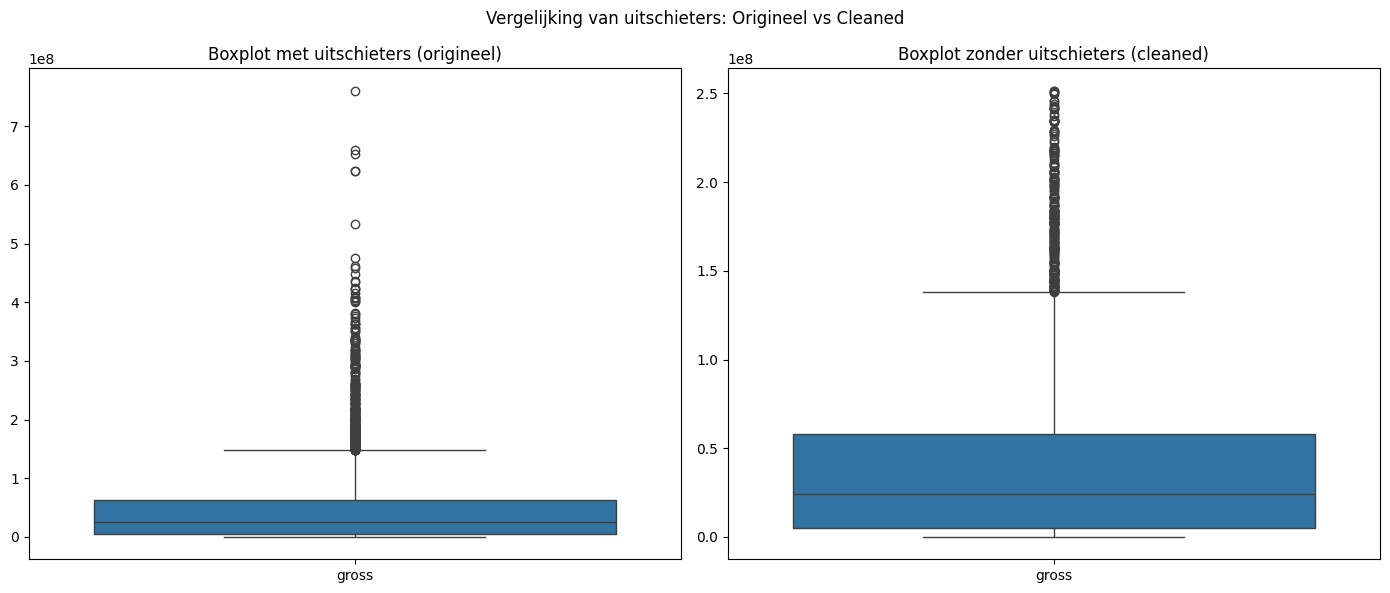

In [9]:
kolommen = ['gross']

# Subsets voor de originele en opgeschoonde dataset
subset_origineel = movie_df_o1[kolommen]
subset_cleaned = movie_df_o1_cleaned[kolommen]

# Maak figuur met 2 boxplots naast elkaar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot voor de originele dataset
sns.boxplot(data=subset_origineel, ax=axes[0])
axes[0].set_title('Boxplot met uitschieters (origineel)')

# Boxplot voor de opgeschoonde dataset
sns.boxplot(data=subset_cleaned, ax=axes[1])
axes[1].set_title('Boxplot zonder uitschieters (cleaned)')

# Toon de plot
plt.suptitle('Vergelijking van uitschieters: Origineel vs Cleaned')
plt.tight_layout()
plt.show()

Om te achterhalen of het weghalen van uitschieters een positief effect heeft op de correlaties tussen de targetvariabele en de featurevariabelen gebruiken we een twee correlatie heatmaps, een heatmap van voor de datapreperation, en een heatmap van na de datapreperation.

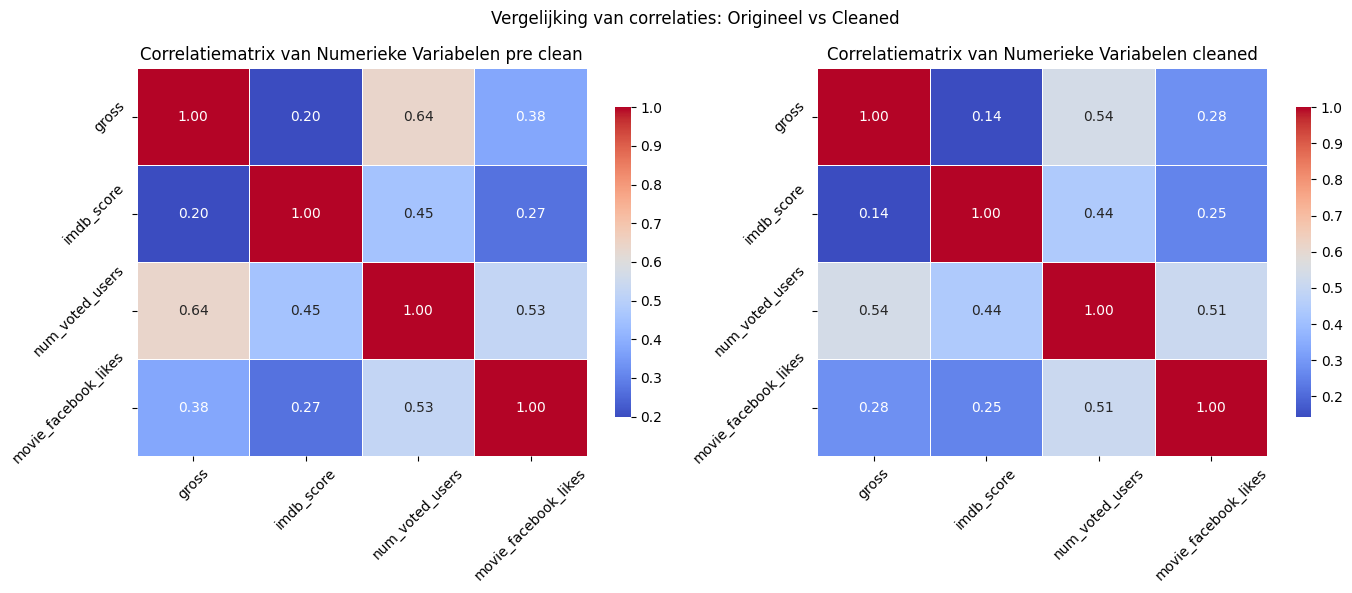

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Selecteer alleen de numerieke kolommen
selected_features = ['gross', 'imdb_score', 'num_voted_users', 'movie_facebook_likes']
numeric_columns = movie_df_o1.select_dtypes(include=[np.number])[selected_features]
numeric_columns_cleaned = movie_df_o1_cleaned.select_dtypes(include=[np.number])[selected_features]

# Bereken de correlatiematrix voor de geselecteerde numerieke kolommen
corr_matrix_0 = numeric_columns.corr()
corr_matrix_1 = numeric_columns_cleaned.corr()

# Maak een heatmap van de correlatiematrix
sns.heatmap(corr_matrix_0, 
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            cbar_kws={'shrink': .8},
            ax=axes[0])
axes[0].set_title('Correlatiematrix van Numerieke Variabelen pre clean')
axes[0].tick_params(labelrotation=45)

# Maak een heatmap van de correlatiematrix
sns.heatmap(corr_matrix_1, 
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            cbar_kws={'shrink': .8},
            ax=axes[1],)
axes[1].set_title('Correlatiematrix van Numerieke Variabelen cleaned')
axes[1].tick_params(labelrotation=45)

# Toon de heatmap
plt.suptitle('Vergelijking van correlaties: Origineel vs Cleaned')
# plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Zorg voor een nette lay-out
plt.show()

In de heatmap zien we dat alle correlaties met gross omlaag gaan na het opschonen, dus we gaan verder met de normale dataset.

We zien in de [Beschrijvende Statistiek](#beschrijvende-statistiek) dat meer dan 25% van de kolom `movie_facebook_likes` een waarde van 0 heeft. Als een film 0 facebook likes heeft is er niet te voorspellen op basis van facebook likes., vaak was een film succuesvol ookal hadden ze geen facebook likes. De uitkomst is dus te random.

Je kunt hier op verschillende manieren mee omgaan. Wij hebben gekozen om de volgende twee manieren te proberen:

1. We kiezen ervoor om alle waardes die 0 zijn te droppen. We kunnen dan dus ook alleenmaar voor films gaan voorspellen die niet 0 facebook likes hebben.

2. We kiezen ervoor om alle 0 waardes op te vullen met het gemiddelde.

In [11]:
movie_df_o1_0_values_gone = movie_df_o1.loc[~(movie_df_o1['movie_facebook_likes'] == 0)]
movie_df_o1_0_values_mean = movie_df_o1
movie_df_o1_0_values_mean['movie_facebook_likes'] = movie_df_o1['movie_facebook_likes'].replace(0, movie_df_o1[movie_df_o1['movie_facebook_likes'] != 0]['movie_facebook_likes'].mean())


Om te kijken welke van deze twee opties het beste is, gaan we weer naar de correlatie kijken.

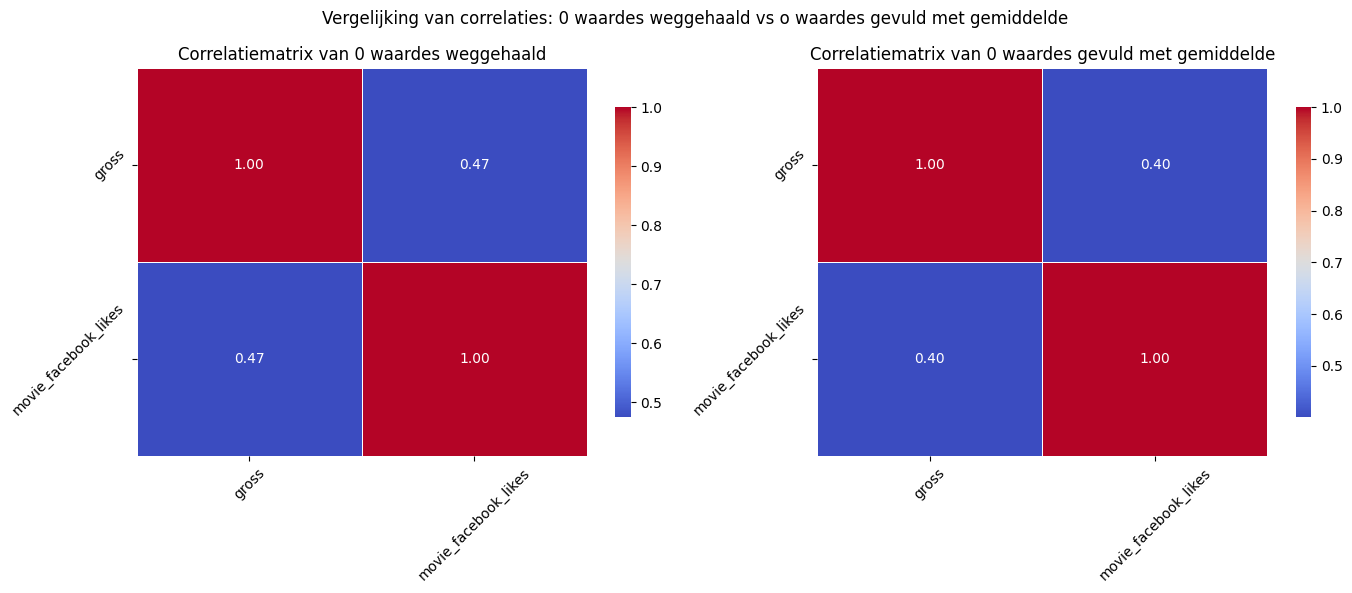

In [12]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Selecteer alleen de numerieke kolommen
selected_features = ['gross', 'movie_facebook_likes']
numeric_columns = movie_df_o1_0_values_gone.select_dtypes(include=[np.number])[selected_features]
numeric_columns_cleaned = movie_df_o1_0_values_mean.select_dtypes(include=[np.number])[selected_features]

# Bereken de correlatiematrix voor de geselecteerde numerieke kolommen
corr_matrix_0 = numeric_columns.corr()
corr_matrix_1 = numeric_columns_cleaned.corr()

# Maak een heatmap van de correlatiematrix
sns.heatmap(corr_matrix_0, 
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            cbar_kws={'shrink': .8},
            ax=axes[0])
axes[0].set_title('Correlatiematrix van 0 waardes weggehaald')
axes[0].tick_params(labelrotation=45)

# Maak een heatmap van de correlatiematrix
sns.heatmap(corr_matrix_1, 
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            cbar_kws={'shrink': .8},
            ax=axes[1],)
axes[1].set_title('Correlatiematrix van 0 waardes gevuld met gemiddelde')
axes[1].tick_params(labelrotation=45)

# Toon de heatmap
plt.suptitle('Vergelijking van correlaties: 0 waardes weggehaald vs o waardes gevuld met gemiddelde')

plt.tight_layout()  # Zorg voor een nette lay-out
plt.show()

Als we de 0 waardes weghalen zien we een hogere correlatie met gross dan wanneer we de 0 waardes vullen met het gemiddelde, dus kiezen we ervoor om de 0 waardes weg te halen.

In [13]:
movie_df_o1 = movie_df_o1_0_values_gone

### Model Training

Omdat de targetvariabele continu is gaan we gebruik maken van een linear regressie model. We beginnen met het definieren van de features en target variabelen en het maken van een train test split.

In [14]:
feat_names = ['imdb_score', 'num_voted_users', 'movie_facebook_likes']
tar_name = ['gross']
feats = movie_df_o1[feat_names]
tar = movie_df_o1[tar_name]

feats_train, feats_test, tar_train, tar_test = train_test_split(feats, tar, random_state=10)
feats_test

,imdb_score,num_voted_users,movie_facebook_likes
5023,6.2,1194,324
4903,6.9,460,96
1137,7.7,452465,89000
60,5.8,283418,13000
2560,7.2,198111,14000
...,...,...,...
2323,8.4,221552,11000
502,5.7,47612,995
3096,7.3,86956,12000
674,6.3,147641,18000


We maken een model en trainen dit model om de train data.

In [15]:
model = linear_model.LinearRegression()
model.fit(feats_train, tar_train)

LinearRegression()

Om dit model te testen gebruiken we score. Voor lineare regressie is de score de determinatiecoëfficiënt. Met dit model is de score 0.406.


In [16]:
model.score(feats_test, tar_test)

0.40584421282083794

In [17]:
pred = model.predict(feats_test)

In [18]:

print(f"RMSE met gebruik van het model: {round(root_mean_squared_error(tar_test, pred), 2)}")
print(f"RMSE met het gemiddelde van de train set gebruiken: {round(root_mean_squared_error(tar_test, [tar_train.mean() for i in range(len(tar_test))]), 2)}")

RMSE met gebruik van het model: 64364691.78
RMSE met het gemiddelde van de train set gebruiken: 83652456.24


### Conclusie

Na het trainen van het model heeft het een determinatiecoëfficiënt van 0.406 gehaald, dit betekent dat het model beter voorspelt dan wanneer we de gemiddelde omzet nemen als voorspelling (score van 0).

<a id="Onderzoeksvraag-2"></a>
## Onderzoeksvraag 2

Is het mogelijk om op basis van de dataset te voorspellen of een film een oscaar heeft gewonnen dan als we alleenmaar gokken dat een film geen oscaar heeft gewonnen.

### Dataverkenning en Data Preperation

Voor onderzoeksvraag twee gaan we een extra dataset importeren. 

In dit tweede dataset staan alle films, sinds 1927, die voor een oscaar genomineerd waren of een oscar hebben gewonnen.

In [19]:
oscars_df = pd.read_csv("the_oscar_award.csv")

In [20]:
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [21]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10889 non-null  int64 
 1   year_ceremony  10889 non-null  int64 
 2   ceremony       10889 non-null  int64 
 3   category       10889 non-null  object
 4   name           10884 non-null  object
 5   film           10570 non-null  object
 6   winner         10889 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 521.2+ KB


In [22]:
oscars_df.isna().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               5
film             319
winner             0
dtype: int64

We gaan alle rijen verwijderen waar de waarde van "film" ontbreekt. De waardes in "film" staan voor de naam van de film. Zonder naam van de film kunnen we geen voorspelling over een film doen. 

In [23]:
oscars_df = oscars_df.dropna(subset=["film"])  # Verwijdert alle NaN's uit de kolom "film".

Alle rijen waar de "name" ontbreekt zijn ook rijen waar de "film" ontbreekt. We houden dus een dataset met 0 NaN's over.

In [24]:
oscars_df.isna().sum().sum()  # Hoeveel NaN's er nog in de dataset zijn.

0

We gaan alle kolommen behalve "film", "year_film" en "winner" verwijderen, omdat ze niet nodig zijn voor de voorspelling.

In [25]:
colums_to_drop = ["year_ceremony", "ceremony", "category", "name"]
oscars_df = oscars_df.drop(labels=colums_to_drop, axis=1)

Verder gaan we ook alle waardes verwijderen waar "winner" False is. Dit doen we omdat het hierdoor makkelijker wordt om de datasets samen te voegen. Na het samenvoegen kunnen we alle waardes die NaN zijn op False zetten omdat we weten dat deze films geen oscar hebben gewonnen.

In [26]:
oscars_df = oscars_df.loc[oscars_df["winner"] == True]

Omdat er een aantal films meer dan een oscar hebben gewonnen staan deze films nu vaker in de dataset. We gaan alle duplicates verwijderen.

In [27]:
oscars_df =  oscars_df.drop_duplicates()

Er staan nu 1343 films die een oscar hebben gewonnen in onze tweede dataset. We houden dit hier als referentie voor na het mergen met de andere dataset.

In [28]:
oscars_df.count()

year_film    1343
film         1343
winner       1343
dtype: int64

#### Datasets Samenvoegen

De "movie_title"'s in het movie_df hebben allemaal whitespaces achter de naam. We gaan de whitespaces verwijderen, zodat we de datasets kunnen mergen.

In [29]:
movie_df["movie_title"] =  movie_df["movie_title"].str.strip()  # Verwijdert alle whitespaces voor en achter alle waardes in movie_title.

We gaan de datasets samenvoegen op de naam van de film (movie_title) en het jaar van de film (title_year). Dit doen we omdat een film soms de zelfde naam heeft, door ook op het jaar te mergen kunnen we zeker stellen dat de juiste rijen worden samengevoegd.

In [30]:
oscars_df.rename(columns={"film" : "movie_title", "year_film" : "title_year"}, inplace=True)  # Vervangt "winner" voor "movie_title" en "year" voor "title_year" zodat de kolomnamen het zelfde zijn voor beide datasets.
movie_df = movie_df.dropna(subset=["title_year"])  # Dropt alle rijen waar title_year NaN is.
movie_df["title_year"] = movie_df["title_year"].astype("int64")  # Maakt van alle waardes in title_year ints.
oscars_df["movie_title"] = oscars_df["movie_title"].str.replace(":", "")  # Replaced ": voor "" voor alle rijen in "movie_title"
movie_df["movie_title"] = movie_df["movie_title"].str.replace(":", "")  # Replaced ": voor "" voor alle rijen in "movie_title"

merged_df = pd.merge(movie_df, oscars_df, on=["movie_title", "title_year"], how="left")  # Mergt de twee datasets als inclusive left join.

In [31]:
merged_df[["movie_title", "winner"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_title  4935 non-null   object
 1   winner       345 non-null    object
dtypes: object(2)
memory usage: 77.2+ KB


In [32]:
aandeel_winners = merged_df["winner"].count() / merged_df["movie_title"].count()  # Berekend het aandeel winners in de gemergde dataset.
print(f"{round(aandeel_winners * 100, 2)} %")

6.99 %


Na het samenvoegen hebben we maar 344 succesvolle merges. Dit komt omdat er helaas een heleboel films die een oscar hebben gewonnen niet in de oorspronkelijke dataset zitten. Er zijn ook een aantal films die net anders zijn geschreven in de twee datasets. We hebben geprobeerd om de merg iets beter te krijgen, door delen van de namen te replacen, maar waren helaas niet zeer successvol (345 in plaats van 344). Vanwegen gebrek aan tijd gaan we hiermee doorwerken, maar als we meer tijd zouden hebben zouden we proberen de dataset aan te vullen met de ontbrekende films. (Dit zouden we kunnen doen door een derde dataset of door de gross, facebook_likes, etc. voor elke film op te zoeken.)

We zien dat 7% van de films in de dataset een onscaar heeft gewonnen. We zullen kijken of deze percentage verandert na het opschonen van de gemergde dataset.

#### Data Prep Merged Dataframe

We gaan de missing values (NaN's) van de kolom "winner" opvullen met False, omdat we kunnen concluderen dat elke film die nu nog geen waarde heeft geen oscar heeft gewonnen. 

We hebben ervoor gekozen om een aantal kolommen te verwijderen, die niet relevant zijn voor de onderzoeksvraag.

In [33]:
merged_df["winner"] = merged_df["winner"].fillna(value=False)

Omdat we na het mergen niet nog meer rijen kwijt willen raken waar een film een oscaar heeft gewonnen, gaan we kijken naar de specifieke NaN values voor deze rijen.

We zien dat er in de kolommen gross en budget een aantal NaN's zitten en gaan deze opvullen.

In [34]:
merged_df.loc[merged_df["winner"] == True].info()

<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 0 to 4824
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      345 non-null    object 
 1   director_name              345 non-null    object 
 2   num_critic_for_reviews     345 non-null    float64
 3   duration                   345 non-null    float64
 4   director_facebook_likes    345 non-null    float64
 5   actor_3_facebook_likes     344 non-null    float64
 6   actor_2_name               345 non-null    object 
 7   actor_1_facebook_likes     345 non-null    float64
 8   gross                      302 non-null    float64
 9   genres                     345 non-null    object 
 10  actor_1_name               345 non-null    object 
 11  movie_title                345 non-null    object 
 12  num_voted_users            345 non-null    int64  
 13  cast_total_facebook_likes  345 non-null    int64  
 14

Het was niet mogelijk om voor elke film de gross of het budget te vinden. Hieronder worden alle waardes opgevuld die we wel hebben kunnen vinden.

In [35]:
gross_values = {
    "All That Jazz": 37823676,
    "Reds": 40382659,
    "The Omen": 60922980,
    "Gandhi": 52767889,
    "The French Connection": 51700000,
    "The Deer Hunter": 48979328,
    "Patton": 61749765,
    "Julia": 20714400,
    "Network": 23689877,
    "Midnight Cowboy": 44785053,
    "The Apartment": 18600000,
    "Days of Heaven": 3446749,
    "The Black Stallion": 37799643,
    "To Kill a Mockingbird": 592237,
    "A Streetcar Named Desire": 53162,
    "From Here to Eternity": 36416,
    "Mr. Smith Goes to Washington": 144738,
    "Spellbound": 19000,
    "Rebecca": 112282
}

budget_values = {
    "All That Jazz": 12000000,
    "Anna Karenina": 40600000,
    "Coal Miner's Daughter": 15000000,
    "Howards End": 8000000,
    "Inside Job": 2000000,
    "An Inconvenient Truth": 1500000
}

for title, value in gross_values.items():
    merged_df.loc[merged_df["movie_title"] == title, "gross"] = value

for title, value in budget_values.items():
    merged_df.loc[merged_df["movie_title"] == title, "budget"] = value

We hebben ervor gekozen om een aantal kolommen te verwijderen die niet relevant zijn voor de onderzoeksvraag.

We verwijderen ook alle rijen waar waardes ontbreken.

In [36]:
colums_to_keep = ["num_critic_for_reviews", "duration", "director_facebook_likes", "gross", "num_voted_users", "cast_total_facebook_likes", "facenumber_in_poster", "budget", "title_year", "imdb_score", "movie_facebook_likes", "winner"]
merged_df = merged_df[colums_to_keep]
merged_df.dropna(inplace=True)  # Dropt alle rijen waar een Nan in voorkomt.

### Model Taining

We gaan een decision tree trainen die als target moet gaan voorspellen of een film wel of niet een oscaar heeft gewonnen.

In [37]:
# Definieer de namen van de feature- en targetkolommen
feature_kolom_namen = ["num_critic_for_reviews", "duration", "director_facebook_likes", "gross", "num_voted_users", "cast_total_facebook_likes", "facenumber_in_poster", "budget", "title_year", "imdb_score", "movie_facebook_likes"]
target_kolom_naam = ["winner"]

# Extraheer de feature- en targetdata uit de samengevoegde DataFrame
features = merged_df[feature_kolom_namen]
target = merged_df[target_kolom_naam]

# Maak nieuwe features aan
features["gross_to_budget_ratio"] = features["gross"] / features["budget"]
features["avg_cast_facebook_likes"] = features["cast_total_facebook_likes"] / features["num_voted_users"]

# Verdeel de data in trainings- en testsets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Definieer de hyperparameter tuning ruimte
param_grid = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10]
}

# Maak en train een Random Forest Classifier met hyperparameter tuning
model = RandomForestClassifier(criterion="gini")
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1_macro")
grid_search.fit(features_train, target_train.values.ravel())

# Sla het beste model op schijf op met behulp van joblib
beste_model = grid_search.best_estimator_
joblib.dump(beste_model, 'beste_random_forest_model.pkl')  # Model opslaan

# Doe voorspellingen op de testdata
target_voorspellingen = beste_model.predict(features_test)

# Evalueer de prestaties van het model met behulp van de F1-score
f1 = f1_score(target_test.values.ravel(), target_voorspellingen, average="macro")
print(f"Model F1-score: {f1:.3f}")

Model F1-score: 0.706


Decision Tree Plot

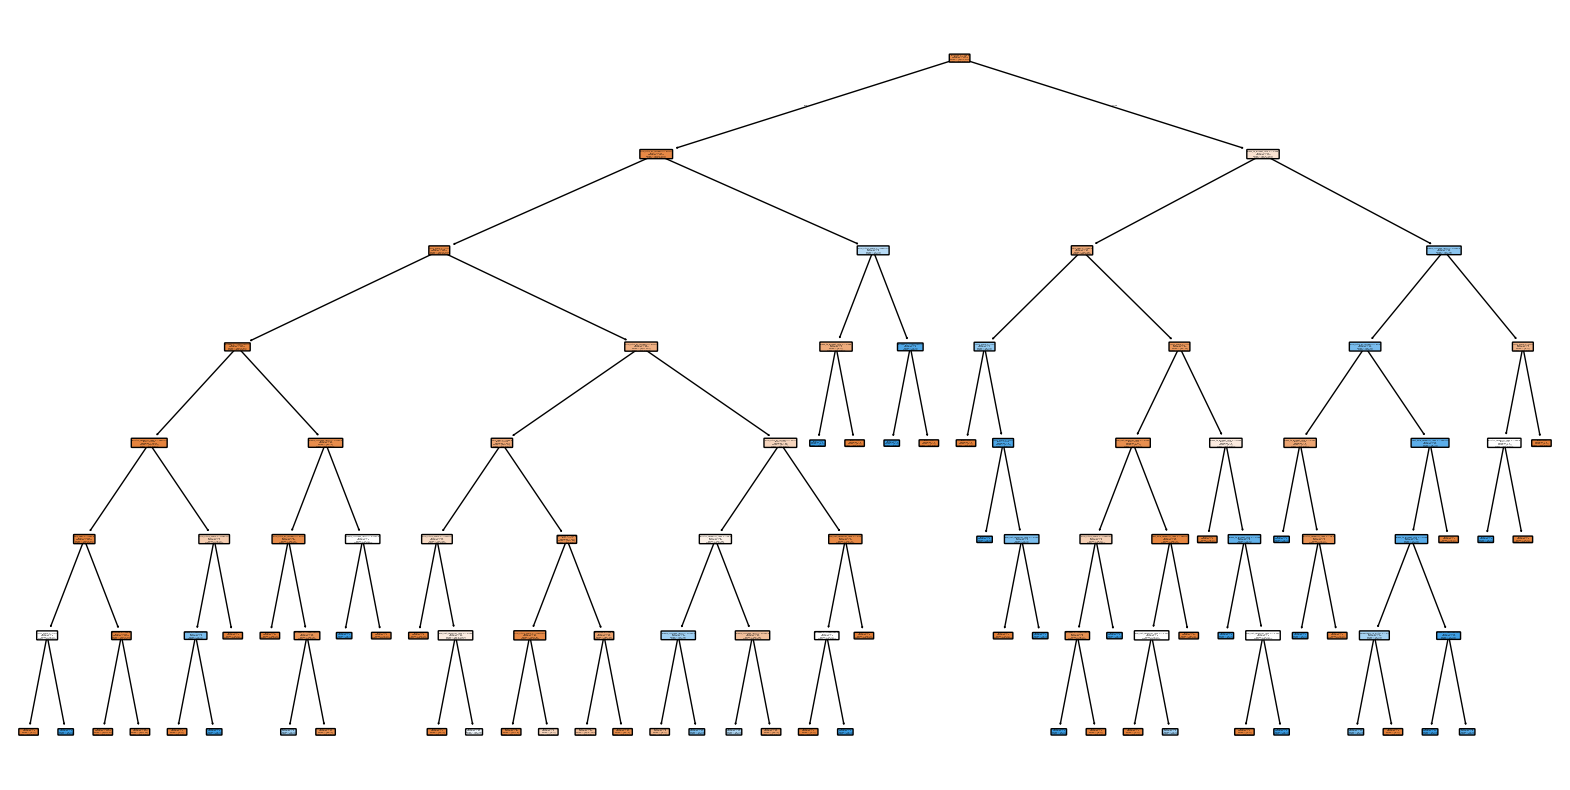

In [38]:
# Bereken de gemiddelde feature importance van elke boom in het bos
importances = np.mean([tree.feature_importances_ for tree in beste_model.estimators_], axis=0)

# Pak de boom met de hoogste feature importance score
best_tree_index = np.argmax(importances)
best_tree = beste_model.estimators_[best_tree_index]

# Visualiseren van de 'beste' boom op basis van de feature importance
plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=features.columns, filled=True, rounded=True, class_names=["Not Winner", "Winner"])
plt.show()


In deze test gaan we vergelijken hoe het basismodel scored versus de random dorest model.

In [39]:
# Definieer de voorspellingen van het basismodel (altijd 'geen winst' voorspellen, waarbij 0 'geen winst' betekent)
baseline_voorspellingen = [0] * len(target_test)

# Evalueer de prestaties van het basismodel met behulp van de F1-score
baseline_f1 = f1_score(target_test.values.ravel(), baseline_voorspellingen, average="macro")
print(f"Basismodel F1-score (altijd voorspelt geen winst): {baseline_f1:.3f}")

# Vergelijk met het getrainde Random Forest-model
print(f"Getraind Random Forest Model F1-score: {f1:.3f}")

# Toon de verbetering ten opzichte van het basismodel
verbetering = f1 - baseline_f1
print(f"Verbetering ten opzichte van het basismodel: {verbetering:.3f}")

Basismodel F1-score (altijd voorspelt geen winst): 0.476
Getraind Random Forest Model F1-score: 0.706
Verbetering ten opzichte van het basismodel: 0.230


### Conclusie

In deze case voorspelt het basismodel altijd 'geen winst', wat resulteert in een F1-score van 0,476. Het getrainde Random Forest-model heeft echter een aanzienlijk betere F1-score van 0,740. Dit toont aan dat het Random Forest-model in staat is om de prestaties aanzienlijk te verbeteren, met een verbetering van 0,263 ten opzichte van het basismodel. Dit suggereert dat het Random Forest-model effectief is in het identificeren van winnende films.